In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import KDTree

In [108]:
X, y = make_moons(200, noise=0.05)

In [109]:
X.shape

(200, 2)

In [110]:
x, y = X[:,0], X[:,1]


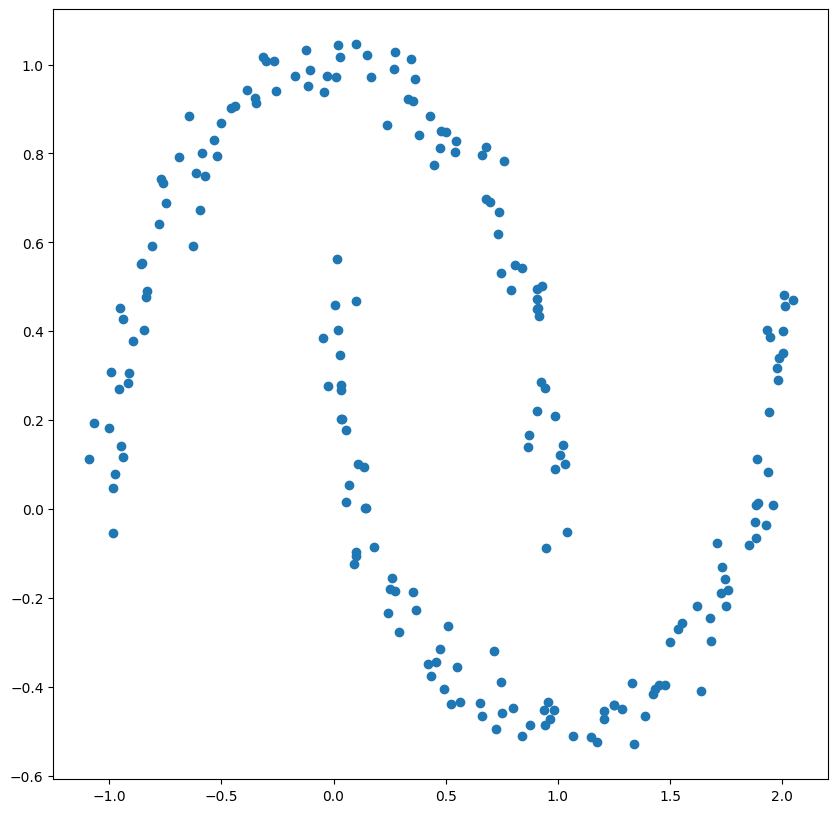

In [111]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'o')
plt.show()

In [125]:
def create_nearest_neighbour_adjacency_matrix(X, k=3):
    n = X.shape[0]
    tree = KDTree(X)
    dist, ind = tree.query(X, k=k+1)

    adj_matrix = np.zeros((n,n))
    # take the non-trivial indices
    ind = ind[:,1:]

    for i in range(n):
        adj_matrix[i][ind[i]] = 1
    
    return adj_matrix

In [207]:
def create_exponential_adjacency_matrix(X, sigma=0.05):
    n = X.shape[0]
    tree = KDTree(X)
    dist, ind = tree.query(X, k=n)
    adj_matrix = np.zeros((n,n))

    for i in range(n):
        adj_matrix[i] = np.exp(-(dist[i]**2)/(2*sigma**2))
    
    return adj_matrix

In [208]:
def create_graph_laplacian(matrix):

    degree_matrix = np.zeros_like(matrix)
    diag_vals = np.sum(matrix, axis=1)
    np.fill_diagonal(degree_matrix, diag_vals)

    L = degree_matrix - matrix
    return L

In [291]:
mat = create_nearest_neighbour_adjacency_matrix(X, k=15)
#mat = create_exponential_adjacency_matrix(X)

mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [292]:
L = create_graph_laplacian(mat)
L

array([[15.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 15.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 15.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.]])

In [293]:
w, v = np.linalg.eigh(L)

In [294]:
v.shape

(200, 200)

In [295]:
w

array([-0.42675037, -0.20449946, -0.03239239,  0.19294261,  0.78509822,
        0.88936283,  1.66167038,  1.7857178 ,  3.1342639 ,  3.35892315,
        4.35607225,  5.02953993,  6.16978674,  6.79752098,  8.34191944,
        8.51922301, 10.08462582, 10.427773  , 11.82504366, 12.02209358,
       13.02871988, 13.21221631, 13.67211654, 13.78080447, 13.84670634,
       13.8690666 , 13.97106924, 14.05516698, 14.09905471, 14.1507629 ,
       14.16544876, 14.22398539, 14.28620219, 14.35203247, 14.39114185,
       14.43867246, 14.48803691, 14.55172888, 14.56250147, 14.6218037 ,
       14.67267625, 14.69617991, 14.74082255, 14.78422676, 14.79758685,
       14.88253564, 14.89992523, 14.92692218, 14.93358027, 14.95677977,
       14.97761884, 15.02187458, 15.03442739, 15.05043039, 15.10131348,
       15.10695284, 15.12259   , 15.15359712, 15.17728646, 15.20235669,
       15.20993069, 15.27585225, 15.29859768, 15.32305098, 15.35590796,
       15.3977313 , 15.41433757, 15.43558056, 15.46420806, 15.49

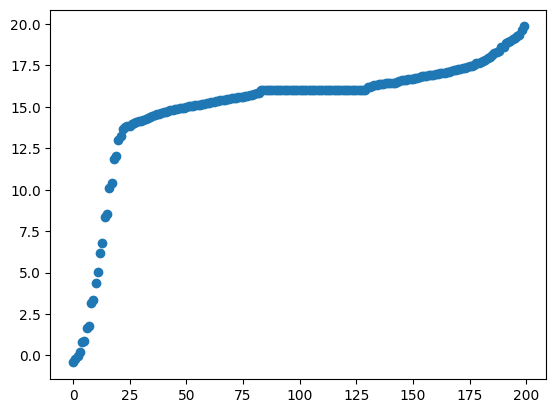

In [296]:
plt.plot(range(200), w, 'o')

In [297]:
eigenvalues = w[:10]
eigenvectors = v[:, :10]

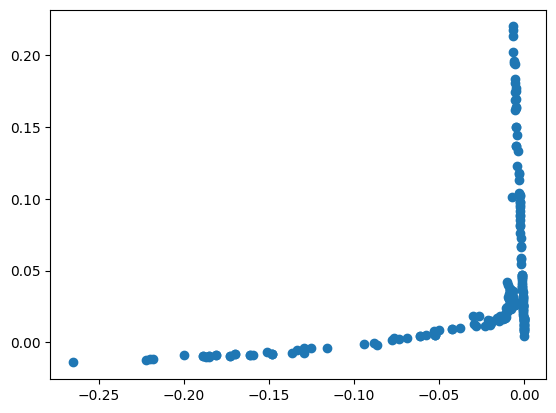

In [298]:
plt.plot(eigenvectors[:,0], eigenvectors[:,1], 'o')

In [299]:
from sklearn.cluster import KMeans

In [300]:
kmeans = KMeans(n_clusters=2).fit(eigenvectors)

kmeans.labels_

c:\Users\YuweiZhu\anaconda3\envs\terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\YuweiZhu\anaconda3\envs\terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [301]:
import plotly.express as px

In [302]:
fig = px.scatter(x=x, y=y, color=kmeans.labels_)
fig.show()